# Feature Engineering

Notebook supporting the [**Do we know our data, as good as we know our tools** talk](https://devoxxuk19.confinabox.com/talk/VEM-8021/Do_we_know_our_data_as_good_as_we_know_our_tools%3F) at [Devoxx UK 2019](http://twitter.com/@DevoxxUK).

The contents of the notebook is inspired by many sources.


### High-level steps covered:

- Find hidden information
  - feature extraction
  - applying statistical functions
  - apply physics functions
- Deal with too much data
  - dimensionality reduction
  - feature selection
- Statistical Inference 


### Resources

- [Basic Feature Engineering With Time Series Data in Python](http://machinelearningmastery.com/basic-feature-engineering-time-series-data-python/)
- [Zillow Prize - EDA, Data Cleaning & Feature Engineering](https://www.kaggle.com/lauracozma/eda-data-cleaning-feature-engineering)
- [Feature-wise transformations](https://distill.pub/2018/feature-wise-transformations)
- [tsfresh - tsfresh is used to to extract characteristics from time series](https://tsfresh.readthedocs.io/en/latest/text/introduction.html)
- [featuretools - an open source python framework for automated feature engineering](https://github.com/featuretools/featuretools/)
- [Synthetic features and outliers notebook](https://colab.research.google.com/notebooks/mlcc/synthetic_features_and_outliers.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=syntheticfeatures-colab&hl=en#scrollTo=jnKgkN5fHbGy)
- [Preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html)

Please refer to the [Slides](http://bit.ly/do-we-know-our-data) for the step here after.

#### Load Your Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
pd.set_option('display.max_columns', None)

df = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

!cat "data/labels_description.csv"

df.columns

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior cove

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

let's set a baseline to evaluate our attempts to improve our model

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def evaluateModelOnDataset(df):
    X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'SalePrice'].values, df["SalePrice"].values, test_size=0.33, random_state=42)
    model = LinearRegression()
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

def evaluateModelOnTrainingAndTestSets(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

df_with_numeric_columns=df[df.select_dtypes(include=[np.number]).columns]
df_with_missing_values_removed=df_with_numeric_columns.dropna();
df=df_with_missing_values_removed
evaluateModelOnDataset(df)

0.8181709487313513

### Find hidden information

- feature extraction
- applying statistical functions
- apply physics functions 

#### Feature extraction

- group together sparse classes
- create new calculated columns, for e.g. extracting weekday from date
- generate relevant labels with the help of results from clustering



####  Applying statistical functions
- convert to absolute values
- apply root mean square
- use logarithmic functions
- applying rolling mean / stddev / min / max 

And manage precision of the data!


#### Apply physics functions
- Energy
- Energy rate
- Short Term Average / Long term Avg
- Kurtosis
- FFT (Fast Fourier Transform)


#### Feature scaling
- Standardization
- Normalization
- map to uniform / gaussian distribution


In [11]:
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'SalePrice'].values, df["SalePrice"].values, test_size=0.33, random_state=42)
X_train_normalized=preprocessing.normalize(X_train)
X_test_normalized=preprocessing.normalize(X_test)
X_train_standardized=preprocessing.scale(X_train)
X_test_standardized=preprocessing.scale(X_test)

In [12]:
print("baseline accuracy: %f" % evaluateModelOnTrainingAndTestSets(X_train, X_test, y_train, y_test))
print("new accuracy for standardized data: %f" % evaluateModelOnTrainingAndTestSets(X_train_standardized, X_test_standardized, y_train, y_test))
print("new accuracy for normalized data: %f" % evaluateModelOnTrainingAndTestSets(X_train_normalized, X_test_normalized, y_train, y_test))

baseline accuracy: 0.818171
new accuracy for standardized data: -40858407160185222070272.000000
new accuracy for normalized data: 0.647328


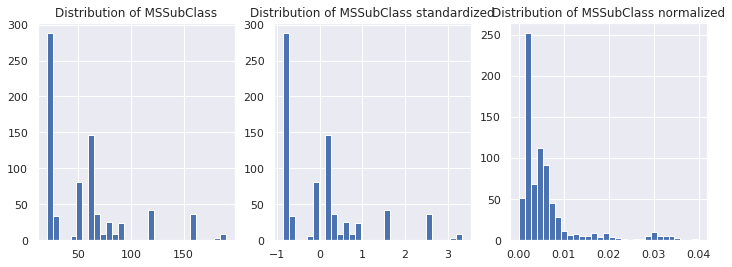

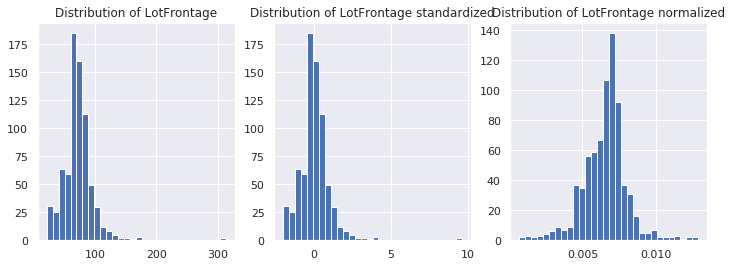

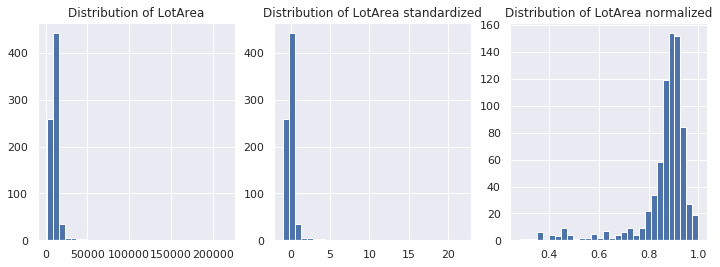

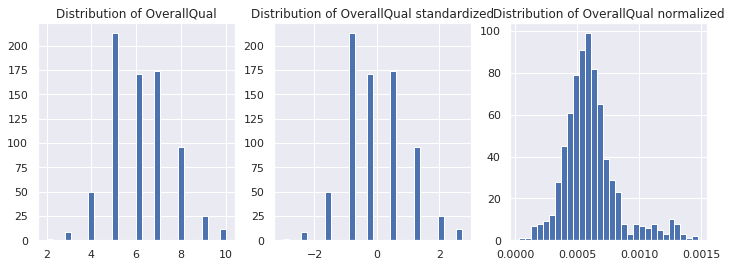

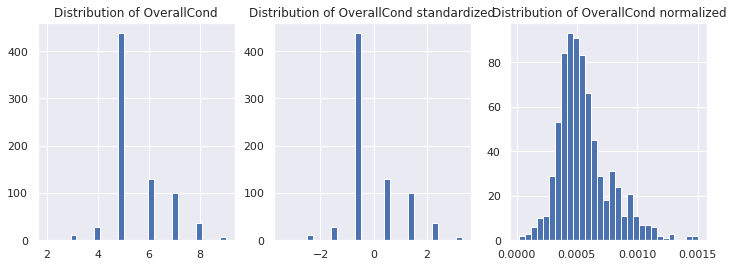

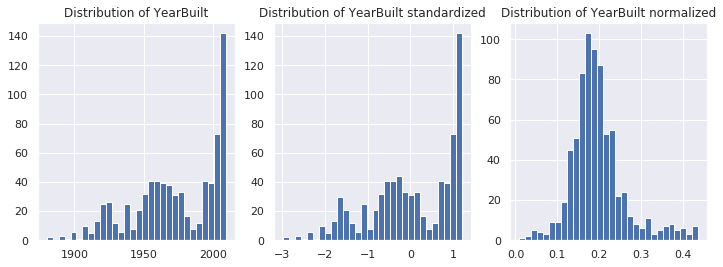

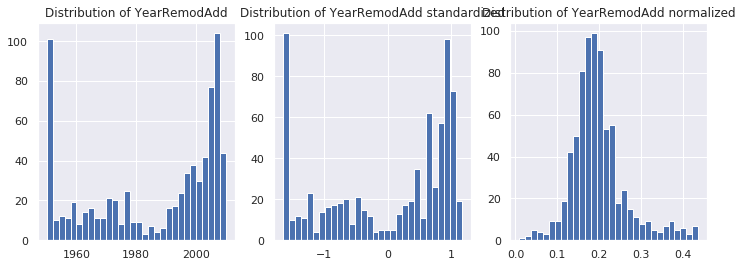

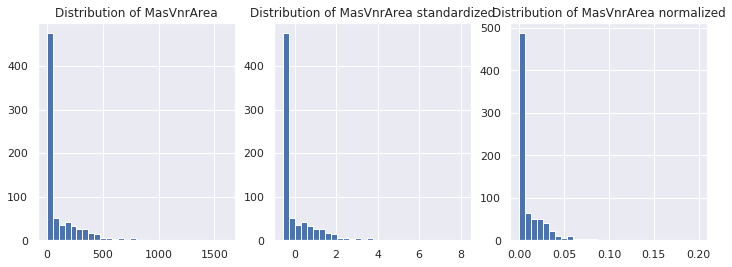

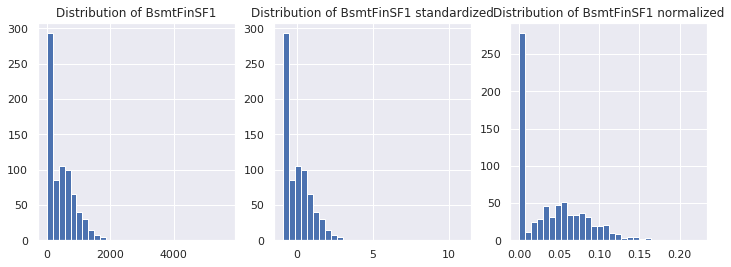

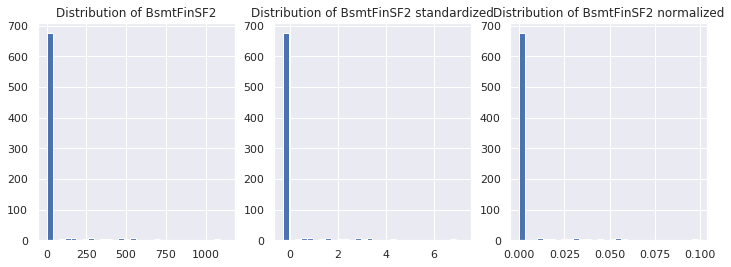

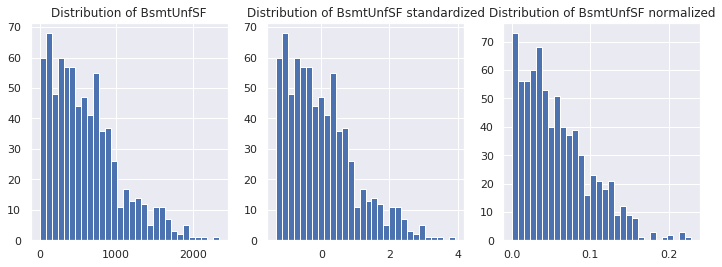

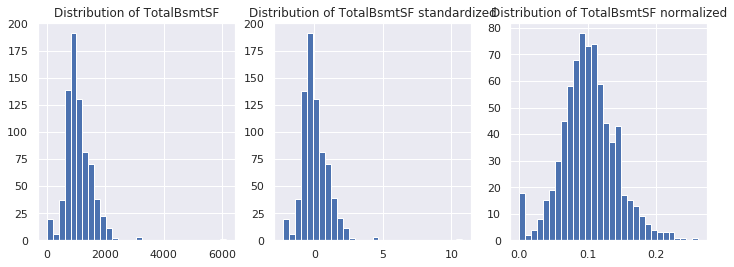

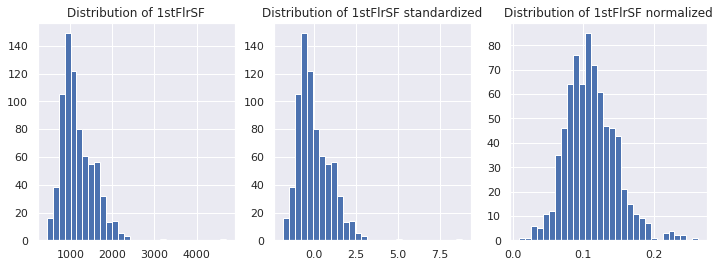

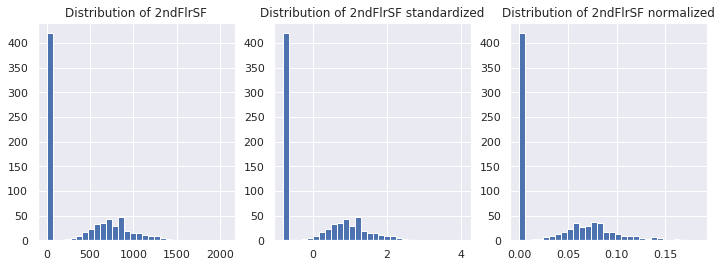

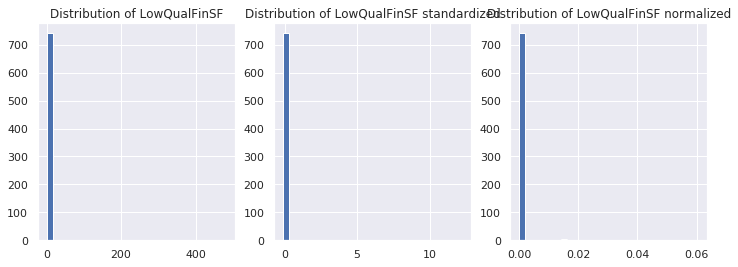

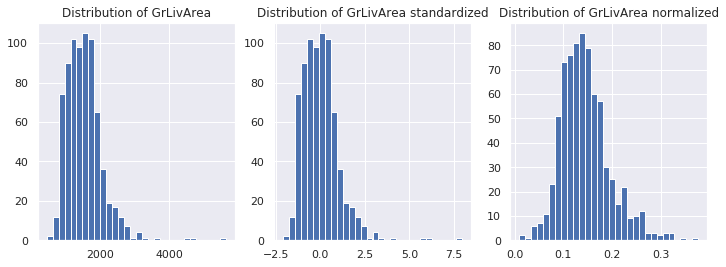

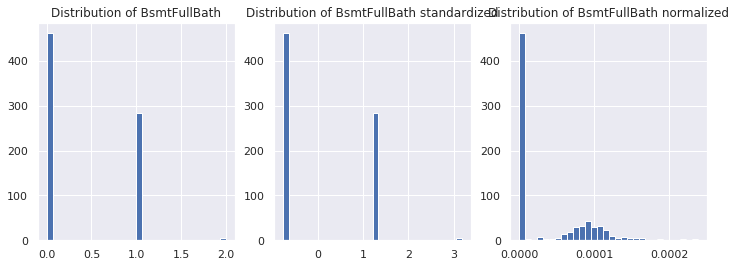

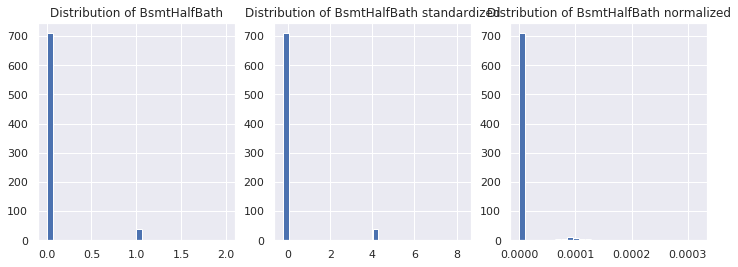

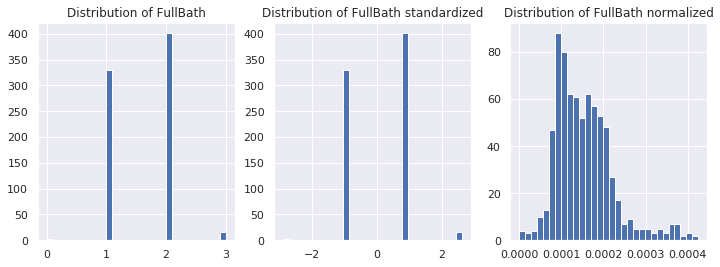

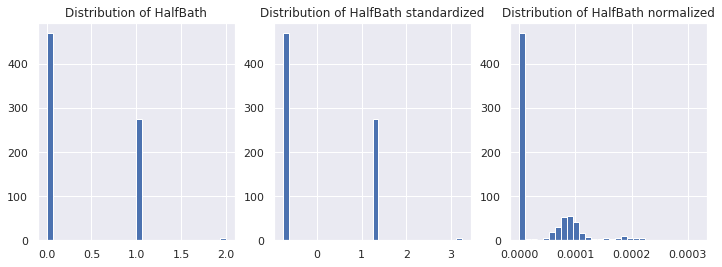

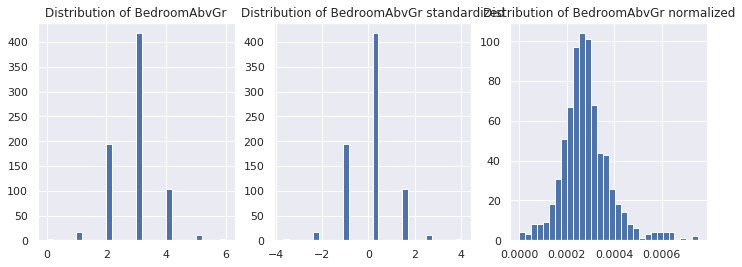

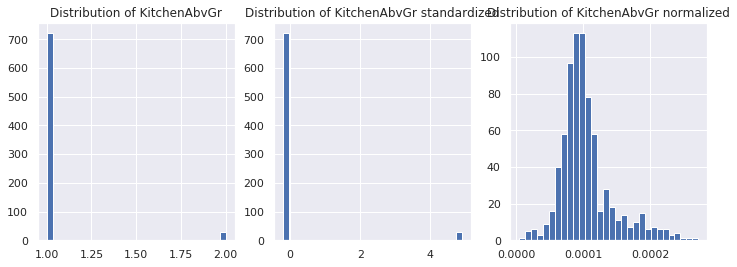

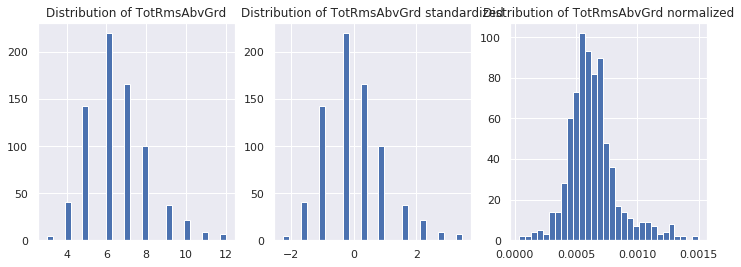

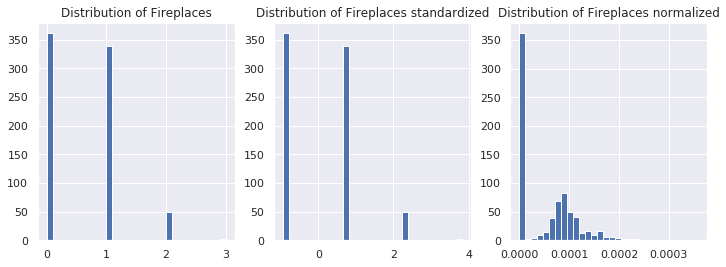

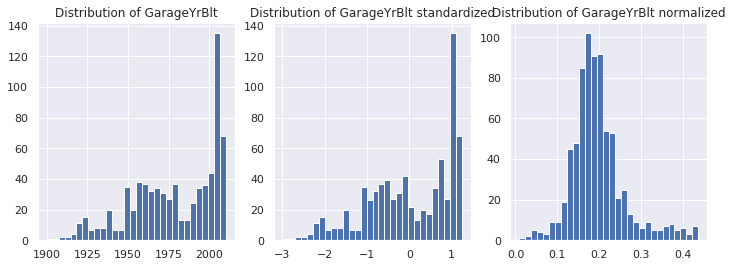

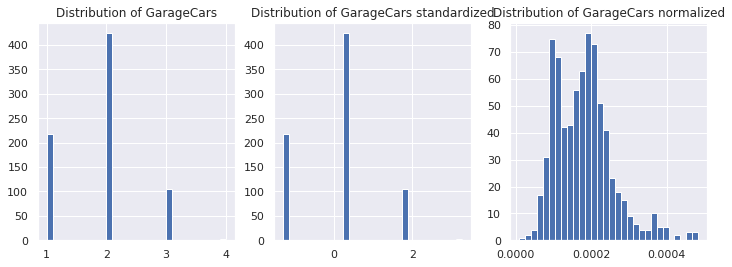

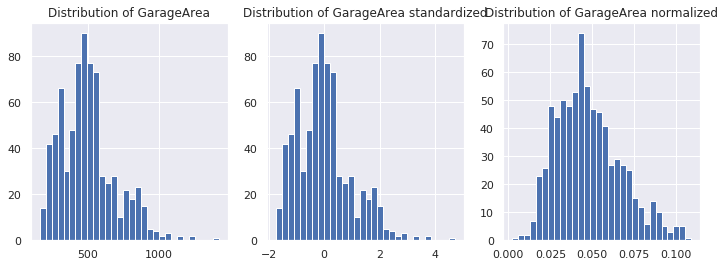

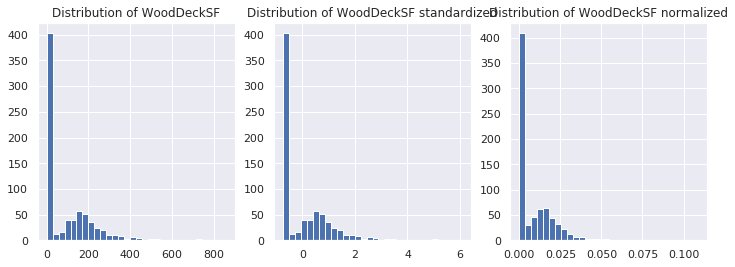

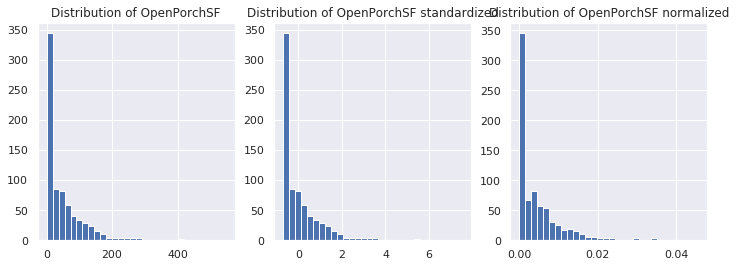

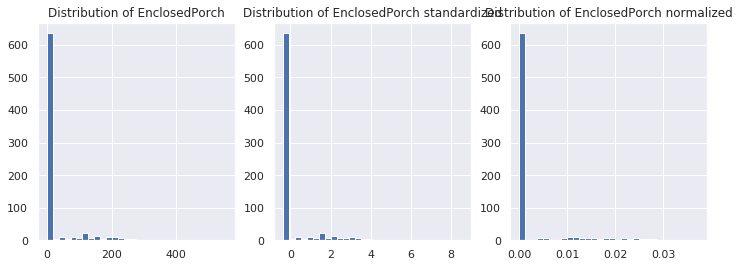

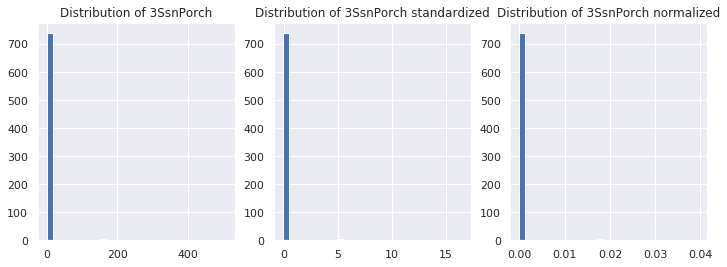

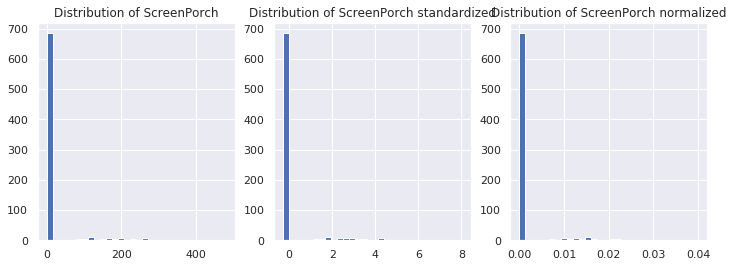

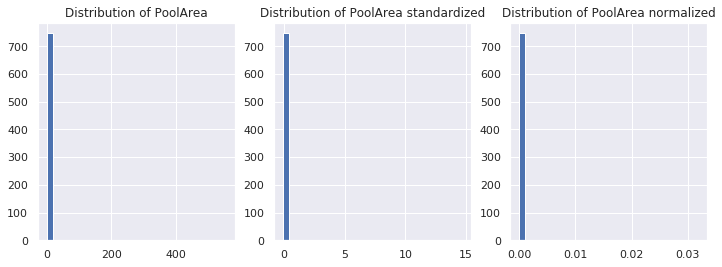

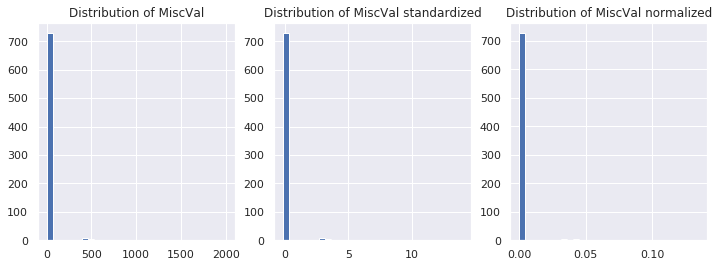

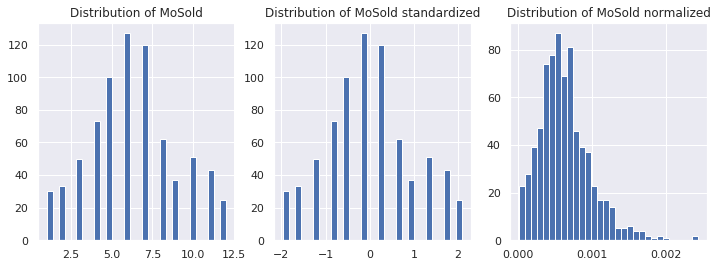

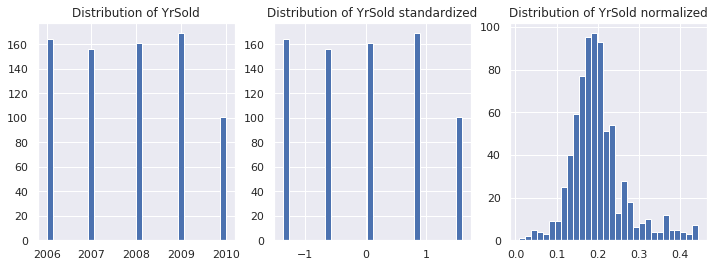

In [15]:
# we loop through all the columns
for index,col in enumerate(df.columns): 
    if(col not in ['SalePrice','Id']):
        # and for each column we create space for one row with 2 charts 
        f, axes = plt.subplots(1, 3, figsize=(12, 4))

        axes[0].hist(X_train[:, index],bins = 30)
        axes[0].set_title('Distribution of '+ col)

        axes[1].hist(X_train_standardized[:, index],bins = 30)
        axes[1].set_title('Distribution of '+ col + ' standardized')

        axes[2].hist(X_train_normalized[:, index],bins = 30)
        axes[2].set_title('Distribution of '+ col + ' normalized')
        # we then use this to command to display the charts
        plt.show()

### Deal with too many features / too much data

- dimensionality reduction
- feature selection

#### Dimensionality reduction

- Factorisation 
    - PCA Principal Component Analysis
- ICA 
Independent Component Analysis
- t-SNE 
t-Distributed Stochastic Neighbour Embedding
- UMAP 
Uniform Manifold Approximation and Projection

#### Feature selection
Manual
- Filter out features which are highly correlated.
- Plot multi scatter chart 
- Use correlation table 
- (might need to remove features which were used for extraction)

#### Correlation Between Attributes

Correlation refers to the relationship between two variables and how they may or may not change together.

#### Feature selection
Manual
- Filter out features which are highly correlated.
- Plot multi scatter chart 
- Use correlation table 
- (might need to remove features which were used for extraction)

The features with high correlations between themselves should not be used together in case of some models (linear regression): dis and nox (-0.77), tax and rad (0.91)

A correlation of -1 or 1 shows a full negative (inverse) or positive (direct) correlation respectively.
A value of 0 shows no correlation at all.


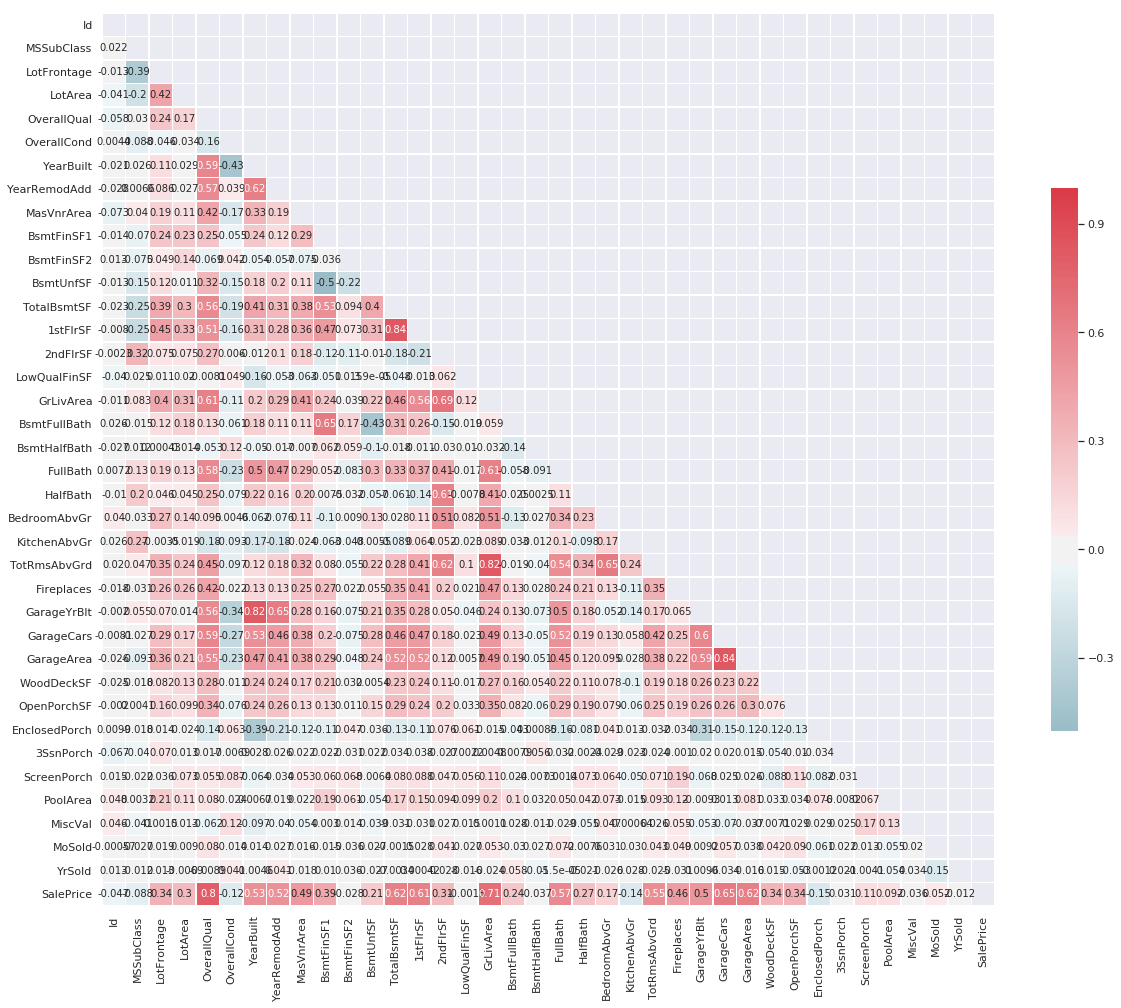

In [19]:
# Pairwise Pearson correlations
pd.set_option('display.width', 100)
pd.set_option('precision', 1)
df_corr=df[df.select_dtypes(include=[np.number]).columns];
correlations = df_corr.corr(method='pearson')
# print(correlations)
# print()
print("A correlation of -1 or 1 shows a full negative (inverse) or positive (direct) correlation respectively.") 
print("A value of 0 shows no correlation at all.")

# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True);

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},\
            annot=True)
#            )
plt.show()
# correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
# sns.heatmap(correlations, annot=True,mask=mask, cmap=cmap)

In [22]:
prev_accuracy =evaluateModelOnDataset(df[df.columns])
print("baseline: %f" % prev_accuracy)
for feature in df.columns[df.columns!='SalePrice']:
    new_accuracy=evaluateModelOnDataset(df.loc[:, df.columns != feature])
    if new_accuracy > prev_accuracy:
        print("accuracy without %s: %f            :)" % (feature, new_accuracy))
    else: 
        print("accuracy without %s: %f" % (feature, new_accuracy))


baseline: 0.818171
accuracy without Id: 0.818257            :)
accuracy without MSSubClass: 0.814454
accuracy without LotFrontage: 0.817367
accuracy without LotArea: 0.815301
accuracy without OverallQual: 0.791048
accuracy without OverallCond: 0.816744
accuracy without YearBuilt: 0.816258
accuracy without YearRemodAdd: 0.817581
accuracy without MasVnrArea: 0.812692
accuracy without BsmtFinSF1: 0.818171            :)
accuracy without BsmtFinSF2: 0.818171            :)
accuracy without BsmtUnfSF: 0.818171            :)
accuracy without TotalBsmtSF: 0.818171
accuracy without 1stFlrSF: 0.818171
accuracy without 2ndFlrSF: 0.818171            :)
accuracy without LowQualFinSF: 0.818171            :)
accuracy without GrLivArea: 0.818171
accuracy without BsmtFullBath: 0.821594            :)
accuracy without BsmtHalfBath: 0.818824            :)
accuracy without FullBath: 0.817679
accuracy without HalfBath: 0.818005
accuracy without BedroomAbvGr: 0.813335
accuracy without KitchenAbvGr: 0.816351
a

Programmatically
- Tree based feature selection
- Use feature importance from XGBoost or RandomForest


/home/jeremie/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy of randomForest on full dataset: 0.963231


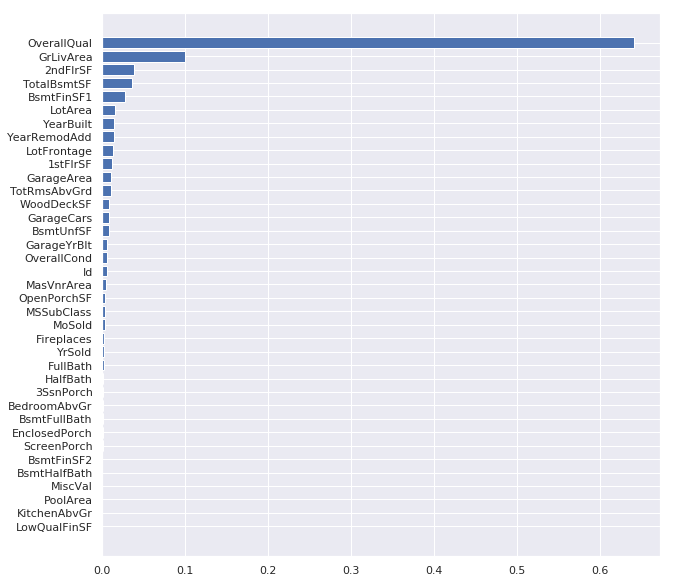

In [33]:
from sklearn.ensemble import RandomForestRegressor

plt.rcParams["figure.figsize"] = (10,10)

labels=df.loc[:, df.columns != 'SalePrice'].columns.values

model = RandomForestRegressor();
model.fit(df[labels],df["SalePrice"].values);
print("accuracy of randomForest on full dataset: %f" % model.score(df[labels],df["SalePrice"].values));

df_features=pd.DataFrame()
df_features["feature"]=labels
df_features["importance"]=model.feature_importances_
df_features.sort_values(by="importance",inplace=True)

y_pos = np.arange(len(df_features))
plt.barh(y_pos,df_features["importance"])
plt.yticks(y_pos,df_features["feature"])

plt.show()

In [58]:
print("baseline: %f" % evaluateModelOnDataset(df))
print("with last features removed: %f" % evaluateModelOnDataset(df.loc[:, (df.columns != 'Id')\
#                                                                        &(df.columns != 'HalfBath')\
#                                                                        &(df.columns != '3SsnPorch')\
#                                                                        &(df.columns != 'BedroomAbvGr')\
                                                                       &(df.columns != 'BsmtFullBath')\
                                                                       &(df.columns != 'EnclosedPorch')\
                                                                       &(df.columns != 'ScreenPorch')\
                                                                       &(df.columns != 'BsmtFinSF2')\
                                                                       &(df.columns != 'BsmtHalfBath')\
                                                                       &(df.columns != 'MiscVal')\
                                                                       &(df.columns != 'PoolArea')\
                                                                       &(df.columns != 'KitchenAbvGr')\
                                                                       &(df.columns != 'LowQualFinSF')]))


baseline: 0.818171
with top features: 0.788093
with last features removed: 0.820116


### Statistical Inference

- [Understanding statistical inference]() [video]
- [Four ideas of Statistical Inference](http://www.bristol.ac.uk/medical-school/media/rms/red/4_ideas_of_statistical_inference.html)
- [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) [book]
- [Statistical Inference](https://www.coursera.org/learn/statistical-inference) [course]


### Please refer to the [Slides](http://bit.ly/do-you-know-your-data) for the step here after.